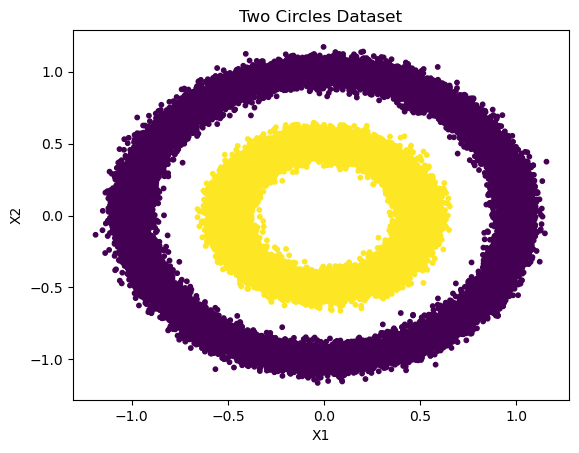

In [2]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
X, y = make_circles(n_samples=50_000, factor=0.5, noise=0.05)
np.savetxt("two_circles.csv", X, delimiter=",", header="x,y", comments="")

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.title("Two Circles Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

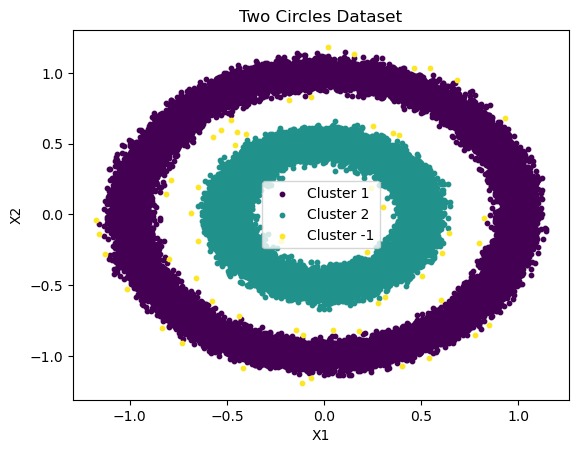

In [4]:
import pandas as pd

df = pd.read_csv('clustered_points.csv')
X = df[['x', 'y']]
y = df['cluster_id']
unique_clusters = y.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    cluster_points = X[y == cluster]
    plt.scatter(cluster_points['x'], cluster_points['y'], label=f'Cluster {cluster}', s=10, color=color)

plt.legend()
plt.title("Two Circles Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

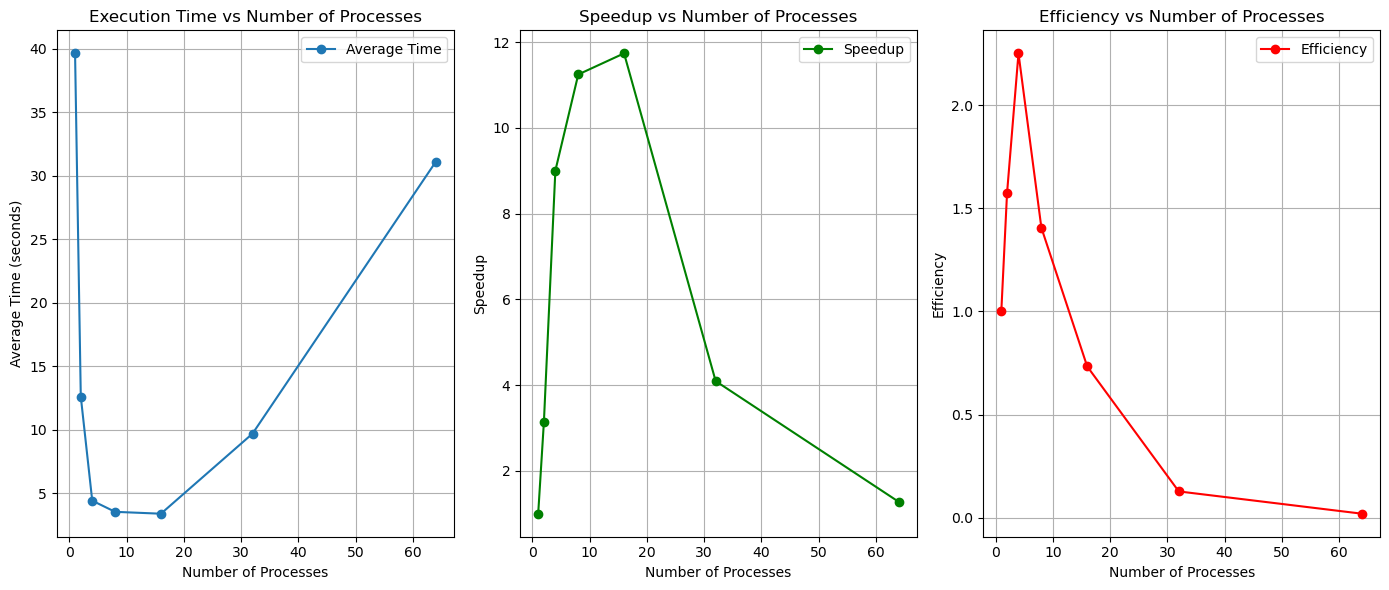

In [5]:
import matplotlib.pyplot as plt
import re

# Чтение данных из текстового файла
def read_data(file_path):
    with open(file_path, 'r') as file:
        data = file.read()

    # Паттерн для извлечения данных
    pattern = r"Processes: (\d+)\s+Run \d+: ([\d.]+) seconds.*?Average time for (\d+) processes: ([\d.]+) seconds"
    matches = re.findall(pattern, data, re.DOTALL)

    processes = []
    avg_times = []

    for match in matches:
        processes.append(int(match[0]))
        avg_times.append(float(match[3]))

    return processes, avg_times

# Функция для вычисления ускорения и эффективности
def calculate_speedup_and_efficiency(processes, avg_times):
    speedup = [avg_times[0] / time for time in avg_times]
    efficiency = [s / p for s, p in zip(speedup, processes)]
    return speedup, efficiency

# Построение графиков
def plot_graphs(processes, avg_times, speedup, efficiency):
    plt.figure(figsize=(14, 6))

    # График времени выполнения
    plt.subplot(1, 3, 1)
    plt.plot(processes, avg_times, marker='o', label='Average Time')
    plt.xlabel('Number of Processes')
    plt.ylabel('Average Time (seconds)')
    plt.title('Execution Time vs Number of Processes')
    plt.grid(True)
    plt.legend()

    # График ускорения
    plt.subplot(1, 3, 2)
    plt.plot(processes, speedup, marker='o', color='green', label='Speedup')
    plt.xlabel('Number of Processes')
    plt.ylabel('Speedup')
    plt.title('Speedup vs Number of Processes')
    plt.grid(True)
    plt.legend()

    # График эффективности
    plt.subplot(1, 3, 3)
    plt.plot(processes, efficiency, marker='o', color='red', label='Efficiency')
    plt.xlabel('Number of Processes')
    plt.ylabel('Efficiency')
    plt.title('Efficiency vs Number of Processes')
    plt.grid(True)
    plt.legend()

    # Показ графиков
    plt.tight_layout()
    plt.show()

# Чтение данных из файла
file_path = 'results.txt'  # Замените на путь к вашему файлу
processes, avg_times = read_data(file_path)

# Вычисление ускорения и эффективности
speedup, efficiency = calculate_speedup_and_efficiency(processes, avg_times)

# Построение графиков
plot_graphs(processes, avg_times, speedup, efficiency)